디지털 신호 처리  
201911006 임지민

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import skimage
from skimage import data
from skimage.exposure import rescale_intensity

## HW10

a) my_imresize function을 만드세요. 반드시 def my_imresize(img, scale) 형태로 만들어야 합니다. 여기서, img는 확대나 축소할 image 이름, scale은 확대 또는 축소비율 (scale=2.9 : 2.9배 크기 확대, scale=0.668 :66.8%로 크기 축소)

In [2]:
def my_imresize(img, scale):
    (x,y)=img.shape
    inv_scale = 1/scale
    (ix, iy)= (int(x*scale), int(y*scale))
    interpolated_img=np.zeros((ix, iy), dtype="uint8")
    
    for i in np.arange(ix-1):
        row = i*inv_scale
        irow = int(row)
        a = row - irow
        for j in np.arange(iy-1):
            col = j*inv_scale
            icol = int(col)
            b = col - icol
            interpolated_img[i, j] = (img[irow,icol]*(1-a)*(1-b) + img[irow,icol+1]*a*(1-b) 
                               + img[irow+1,icol]*(1-a)*b + img[irow+1,icol+1]*a*b).astype("uint8")
    return interpolated_img
    

b)에서 만든 function을 사용하여 실제 영상을 읽고, 확대하고 축소하고, 실제 크기로 display 하세요.

In [3]:
def display_image_in_actual_size(im):

    dpi = mpl.rcParams['figure.dpi']
    #im_data = plt.imread(im_path)
    height, width= im.shape

    # What size does the figure need to be in inches to fit the image?
    figsize = width / float(dpi), height / float(dpi)

    # Create a figure of the right size with one axes that takes up the full figure
    fig = plt.figure(figsize=figsize)
    ax = fig.add_axes([0, 0, 1, 1])

    # Hide spines, ticks, etc.
    ax.axis('off')

    # Display the image.
    ax.imshow(im, cmap='gray')

    plt.show()

In [4]:
cam = data.camera()
img = cam.copy()
img.shape

(512, 512)

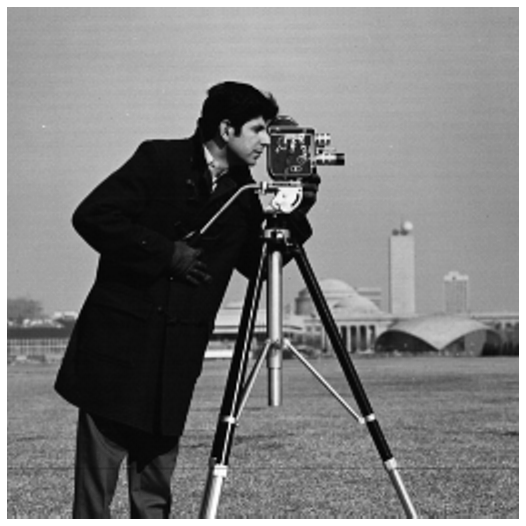

In [5]:
display_image_in_actual_size(img)

### 1.5 배 확대

In [6]:
interpolated_img = my_imresize(img, 1.5)
interpolated_img.shape

(768, 768)

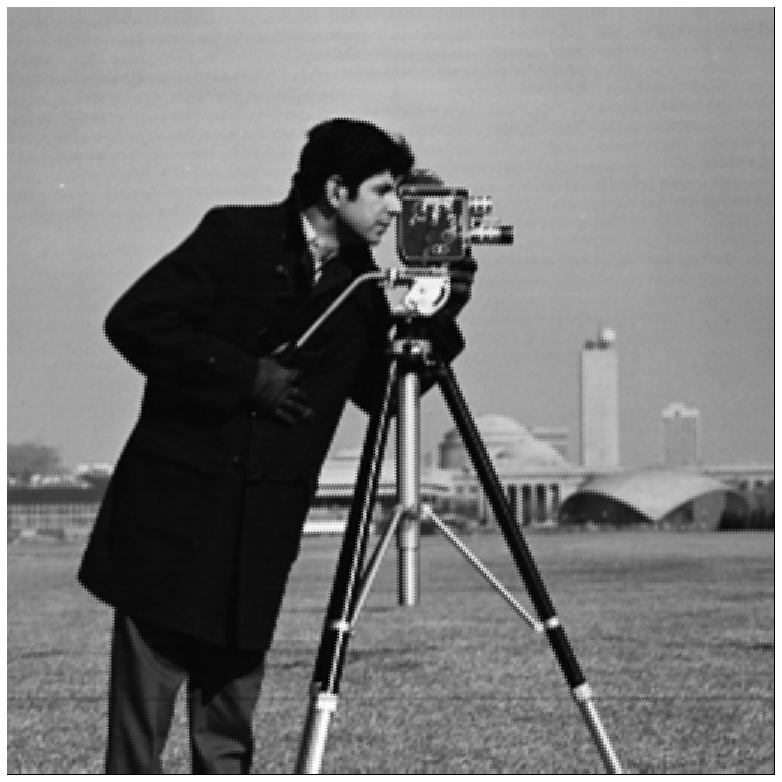

In [7]:
display_image_in_actual_size(interpolated_img)

### 0.5배 축소

In [8]:
interpolated_img = my_imresize(img, 0.5)
interpolated_img.shape

(256, 256)

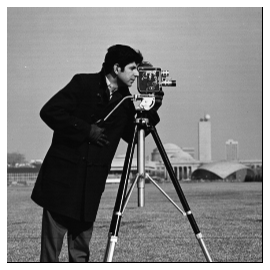

In [9]:
display_image_in_actual_size(interpolated_img)

## HW9

a) convolve 함수를 cropping 방법을 이용하여 output image의 intensity를 image 표현값 안으로 유지할 수 있도록 convolve 함수를 재작성 하세요.

In [10]:
def convolve(image, kernel, scale=1):
	(iH, iW) = image.shape[:2]
	(kH, kW) = kernel.shape[:2]

	pad = (kW - 1)//2
	output = np.zeros((iH-2*pad, iW-2*pad), dtype="float32")

	# loop over the input image, "sliding" the kernel across each (x, y)-coordinate from left-to-right and top to bottom
	for x in np.arange(pad, iH - pad):
		for y in np.arange(pad, iW - pad):
			roi = image[x-pad:x+pad+1, y-pad:y+pad+1]
			output[x-pad, y-pad] = (roi * kernel).sum()*scale
			
	# rescale the output image to be in the range [0, 255]
	output = rescale_intensity(output, in_range=(0, 255))
	output = (output * 255).astype("uint8")
 
	# return the output image
	return output

b) 3x3 Gaussian filter 와 7x7 Gaussian filter를 사용하여 cat 이미지를 smoothing 하여 그림을 출력하고, 그 차이점을 설명하세요.

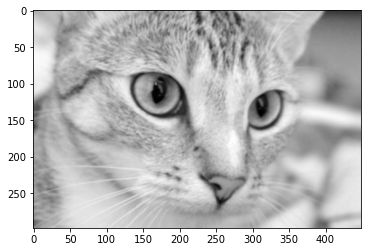

In [11]:
cat = data.chelsea()
arr_3 = np.array((
      [1,2,1],
      [2,4,2],
      [1,2,1]), dtype = "int")
filtered = convolve(cat[:,:,0], arr_3, scale = 1/16)
plt.imshow(filtered, cmap = plt.cm.gray)
plt.show()

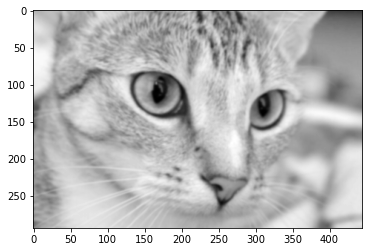

In [12]:
arr_7 = np.array((
      [0,0,1,2,1,0,0],
      [0,3,13,22,13,3,0],
      [1,13,59,97,59,13,1],
      [2,22,97,159,97,22,2],
      [1,13,59,97,59,13,1],
      [0,3,13,22,13,3,0],
      [0,0,1,2,1,0,0]), dtype = "int")

filtered = convolve(cat[:,:,0], arr_7, scale = 1/1003)
plt.imshow(filtered, cmap = plt.cm.gray)
plt.show()

3x3 Gaussian filter 보다 7x7 Gaussian filter가 더 블러처리가 된 것을 확인할 수 있다

c) 3x3 Laplacian filter를 사용하여 cat 이미지의 윤곽선을 추출하고 그림을 출력하세요. 또한, b)에서 smoothing 된 이미지를 이용하여 윤곽선을 추출하고 그림을 출력하세요. 두 가지 경우의 차이점을 설명하세요.

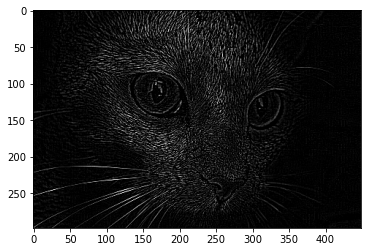

In [13]:
Laplacian_3 = np.array((
              [-1,-1,-1],
              [-1,8,-1],
              [-1,-1,-1]), dtype = "int")

filtered = convolve(cat[:,:,0], Laplacian_3)
plt.imshow(filtered, cmap = plt.cm.gray)
plt.show()

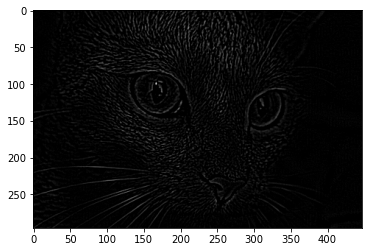

In [14]:
arr_3 = np.array((
      [1,2,1],
      [2,4,2],
      [1,2,1]), dtype = "int")

filtered = convolve(cat[:,:,0], arr_3, scale = 1/16)
filtered = convolve(filtered, Laplacian_3)
plt.imshow(filtered, cmap = plt.cm.gray)
plt.show()

첫 번째 이미지는 노이즈가 제거되지 않아 두 번째 이미지보다 edge가 덜 선명하다.